In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Num GPUs Available:  0


False

In [2]:
import tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2,random_state=42)

In [5]:
# 정규화 또는 표준화 --> 스케일링
# 이미지는 픽셀당 값의 범위가 0 ~ 255 그래서 모든 픽셀을 255로 나누면 0 ~ 1 사이를 가지는 스케일링
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [6]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

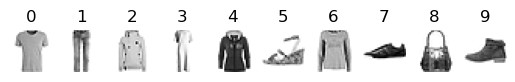

In [7]:
import matplotlib.pyplot as plt
for i, idx in enumerate([np.where(y_train == i)[0][0] for i in range(10)]):
  plt.subplot(1,10,i+1)
  plt.title(i)
  plt.axis('off')
  plt.imshow(x_train[idx],cmap='gray_r')

분류

In [8]:
# 딥러닝 신경망 구현
# 컴파일
# 학습(fit)
# evaluate x_test로 평가

In [9]:
x_train.shape[1:]

(28, 28)

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, input_shape=x_train.shape[1:]),
    tf.keras.layers.Input(shape = x_train.shape[1:]), # tf.keras.layers.Input(shape=[28,28])
    # 1차원으로 차원을 변경
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', # 최적화 방법
              loss='sparse_categorical_crossentropy',  # 손실함수
              metrics=['accuracy']) # 평가 방법

In [13]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7733 - loss: 0.6445 - val_accuracy: 0.8447 - val_loss: 0.4185
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8605 - loss: 0.3831 - val_accuracy: 0.8566 - val_loss: 0.3792
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8771 - loss: 0.3375 - val_accuracy: 0.8615 - val_loss: 0.3712
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8864 - loss: 0.3093 - val_accuracy: 0.8740 - val_loss: 0.3450
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8946 - loss: 0.2862 - val_accuracy: 0.8716 - val_loss: 0.3493
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8993 - loss: 0.2670 - val_accuracy: 0.8746 - val_loss: 0.3536
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9050 - loss: 0.2529 - val_accuracy: 0.8801 - val_loss: 0.3432
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9106 - loss: 0.2380 - 

In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

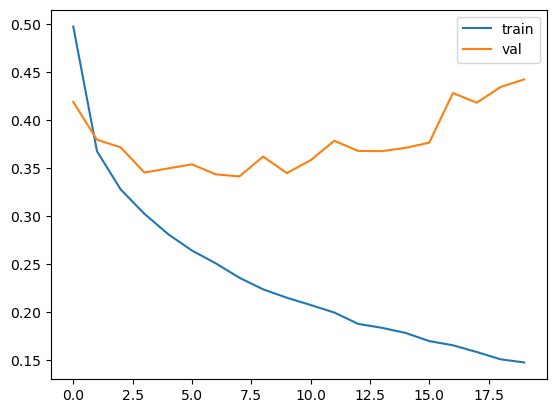

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

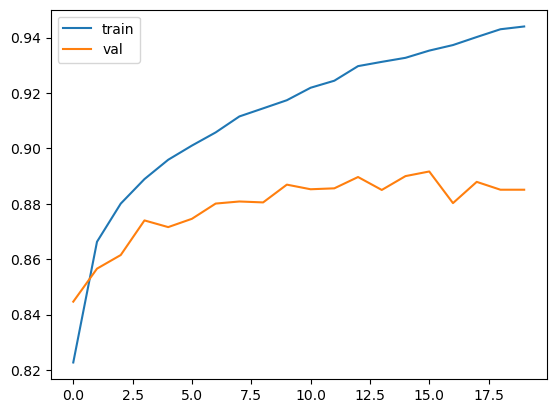

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

<Axes: >

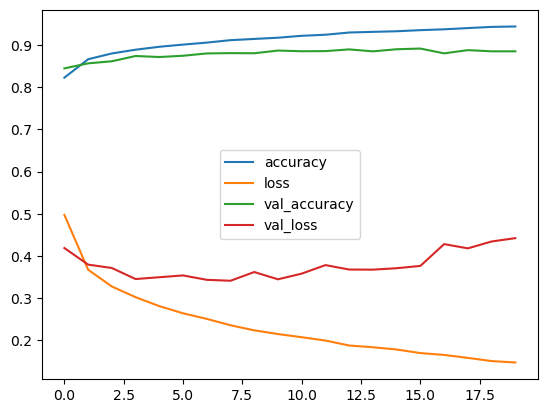

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [18]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.4545


[0.46206405758857727, 0.8794999718666077]

Dense 적용

In [19]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, input_shape=x_train.shape[1:]),
    tf.keras.layers.Input(shape = x_train.shape[1:]), # tf.keras.layers.Input(shape=[28,28])
    # 1차원으로 차원을 변경
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [20]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model2.compile(optimizer='adam', # 최적화 방법
              loss='sparse_categorical_crossentropy',  # 손실함수
              metrics=['accuracy']) # 평가 방법

In [22]:
history = model2.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6526 - loss: 0.9721 - val_accuracy: 0.8353 - val_loss: 0.4524
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8082 - loss: 0.5433 - val_accuracy: 0.8493 - val_loss: 0.4167
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8228 - loss: 0.4966 - val_accuracy: 0.8617 - val_loss: 0.3854
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8361 - loss: 0.4637 - val_accuracy: 0.8649 - val_loss: 0.3709
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8391 - loss: 0.4501 - val_accuracy: 0.8629 - val_loss: 0.3666
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8437 - loss: 0.4439 - val_accuracy: 0.8689 - val_loss: 0.3581
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8475 - loss: 0.4224 - val_accuracy: 0.8674 - val_loss: 0.3581
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8541 - loss: 0.4102 - 

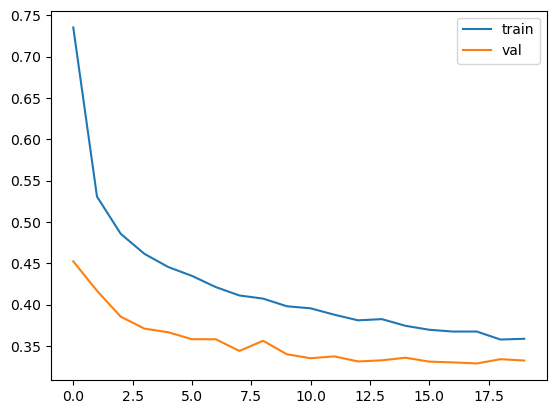

In [23]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

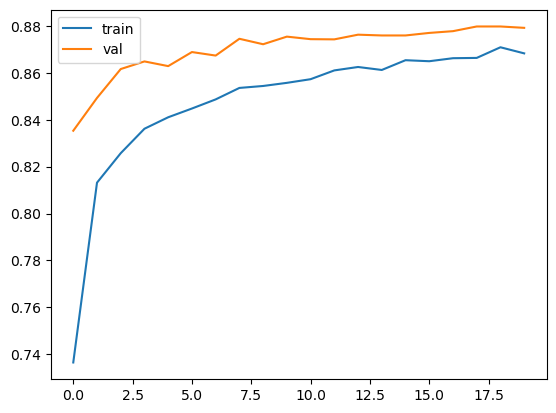

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

<Axes: >

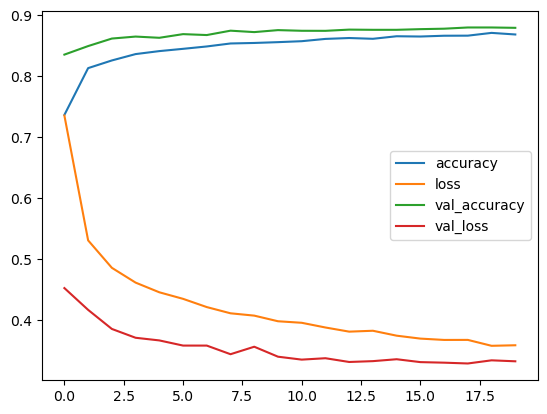

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [26]:
model2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.3516


[0.3561614751815796, 0.8772000074386597]

In [27]:
# 예측
y_pred = model.predict(x_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.5556866e-10, 5.0514874e-12, 1.1410462e-11, 5.2162013e-13,
       9.0356723e-15, 3.7957570e-06, 3.8786525e-09, 3.0587673e-06,
       1.7287853e-12, 9.9999309e-01], dtype=float32)

In [28]:
np.argmax(y_pred[0])

9

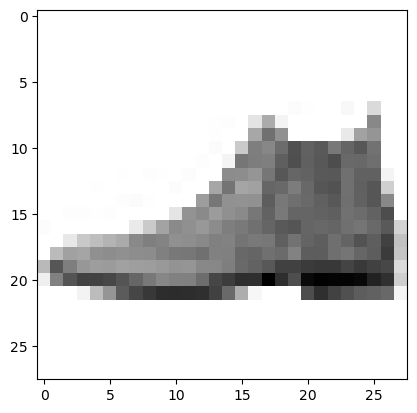

In [29]:
plt.imshow(x_test[0],cmap='gray_r')
plt.show()

회귀

In [30]:
from tensorflow import keras
input_ = keras.layers.Input(shape=x_test.shape[1:])
tf.keras.layers.Flatten()
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model3 = keras.Model(inputs=[input_],outputs=[output])

In [31]:
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 28, 30)    │        870 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 28, 30)    │        930 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 58)    │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 28, 1)     │         59 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,859 (7.26 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 조립
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 와이드 & 딥 신경망
normalization_layer = keras.layers.Normalization()
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full)
print(x_train.shape)

input_ = tf.keras.layers.Input(shape=x_test.shape[1:])
normalized = normalization_layer(input_)
hidden1 = keras.layers.Dense(30,activation='relu')(normalized)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([normalized,hidden2])
output = keras.layers.Dense(1)(concat)


(11610, 8)


In [33]:
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 28, 30)    │        870 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 28, 30)    │        930 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 58)    │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 28, 1)     │         59 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,859 (7.26 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# API 연결방식
# 와이드 & 딥 신경망 (일부 경로를 적용)
input_wide = tf.keras.layers.Input(shape=[5]) # 와이드의 입력
normal_wide = tf.keras.layers.Normalization()(input_wide)

input_deep = tf.keras.layers.Input(shape=[6]) # 딥 신경망의 입력시퀀스하게 연결
normal_deep = tf.keras.layers.Normalization()(input_deep)

hidden1 = tf.keras.layers.Dense(30,activation='relu')(input_deep)
hidden2 = tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([normal_wide,hidden2]) # 와이드와 결합
output = tf.keras.layers.Dense(1)(concat)

model4 = keras.Model(inputs=[input_wide,input_deep],outputs=[output])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 799,832 (3.05 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,222 (2.03 MB)

In [35]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [36]:
(x_train_full,y_train_full),(x_test,y_test) = tf.keras.datasets.california_housing.load_data()
x_train_full.shape, x_test.shape, y_train_full.shape, y_test.shape
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


((13209, 8), (3303, 8), (13209,), (3303,))

- 일반적인 딥러닝 신경망
  - API 방식
    - 객체를 만들고 객체 단위로 결합
    - 중간에 레이어를 삽입해도 되고, 삭제도 가능
    - 모델을 저장했을 때.. 불러와서 특정 레이어까지 잘라서 다음은 커스텀한 레이어를 추가
    - 결합할 때는 model을 이용 sequence 방식이 아님

In [37]:
# 입력레이어
# 정규화 레이어
# 히든레이어를 2개
# 출력레이어

In [38]:
# 샘플 데이터의 모양 shape
x_train.shape, x_train.shape[1:]

((13209, 8), (8,))

In [39]:
input = tf.keras.layers.Input(shape=x_train.shape[1:])
normal = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate() # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = normal(input)
x = hidden1(x_)
x = hidden2(x)
# x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [40]:
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=14,validation_data=(x_val,y_val))

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_3 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 223436.7500 - loss: 50093793280.0000 - val_RootMeanSquaredError: 163088.9844 - val_loss: 26598019072.0000
Epoch 2/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 164205.9688 - loss: 26977437696.0000 - val_RootMeanSquaredError: 160099.6094 - val_loss: 25631887360.0000
Epoch 3/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 160901.4844 - loss: 25902325760.0000 - val_RootMeanSquaredError: 156262.9219 - val_loss: 24418099200.0000
Epoch 4/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 156490.3281 - loss: 24501940224.0000 - val_RootMeanSquaredError: 150463.8281 - val_loss: 22639364096.0000
Epoch 5/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 149800.6406 - loss: 22453020672.0000 - val_RootMeanSquaredError: 141229.0938 - val_loss: 19945658368.0000
Epoch 6/14
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 138938.4375 - 

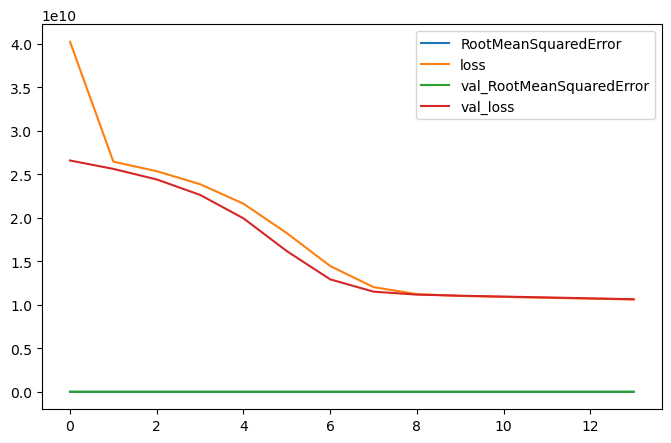

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [42]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


0.18129855394363403

In [43]:
input = tf.keras.layers.Input(shape=x_train.shape[1:])
normal = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate() # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = normal(input)
x = hidden1(x_)
x = hidden2(x)
x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [44]:
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 8)         │         17 │ input_layer_7[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 30)        │        270 │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 30)        │        930 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 38)        │          0 │ dense_19[0][0],   │
│ (Concatenate)       │                   │            │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │         39 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 225169.2812 - loss: 50835746816.0000 - val_RootMeanSquaredError: 164246.2031 - val_loss: 26976815104.0000
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 165406.4844 - loss: 27373291520.0000 - val_RootMeanSquaredError: 161421.7031 - val_loss: 26056964096.0000
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 162705.0781 - loss: 26487121920.0000 - val_RootMeanSquaredError: 158373.8281 - val_loss: 25082267648.0000
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 159308.9688 - loss: 25392992256.0000 - val_RootMeanSquaredError: 154389.6406 - val_loss: 23836162048.0000
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 154651.9219 - loss: 23930611712.0000 - val_RootMeanSquaredError: 148285.2969 - val_loss: 21988530176.0000
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 147744.5312 - 

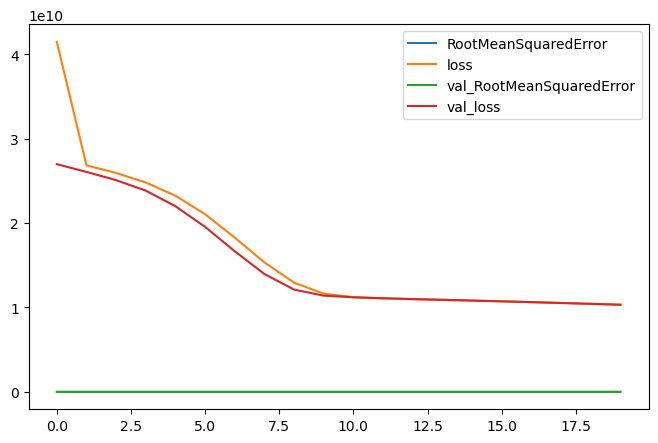

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [47]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


0.20393282175064087

- 딥러닝 적용
  - 타이타닉 생존자 분류
  - iris 품종 분류

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [50]:
df.drop(columns=['embarked','deck','alive'],inplace=True)
df.dropna(inplace=True)
df_obj = df.select_dtypes(include=['object','category','bool']).columns
df_num = df.select_dtypes(include=['int','float']).columns

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[df_obj] = df[df_obj].apply(le.fit_transform)

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,1


In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['survived'])
y = df['survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

input = tf.keras.layers.Input(shape=x_train.shape[1:])
normal = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30,activation='relu')
hidden2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate() # 출력결과 합치기
output = tf.keras.layers.Dense(1)

x_ = normal(input)
x = hidden1(x_)
x = hidden2(x)
# x = concat([x,x_])
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [54]:
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['RootMeanSquaredError'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_5 (Normalization) │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,344 (5.25 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 23 (96.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - RootMeanSquaredError: 6.7596 - loss: 47.1055 - val_RootMeanSquaredError: 2.5679 - val_loss: 6.5940
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 2.2535 - loss: 5.1351 - val_RootMeanSquaredError: 1.3131 - val_loss: 1.7241
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 1.3006 - loss: 1.6926 - val_RootMeanSquaredError: 1.1788 - val_loss: 1.3896
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 1.1292 - loss: 1.2757 - val_RootMeanSquaredError: 0.9839 - val_loss: 0.9681
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 0.9049 - loss: 0.8191 - val_RootMeanSquaredError: 0.8666 - val_loss: 0.7510
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.8078 - loss: 0.6528 - val_RootMeanSquaredError: 0.7408 - val_loss: 0.5487
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.7129 - loss: 0.5083 - 

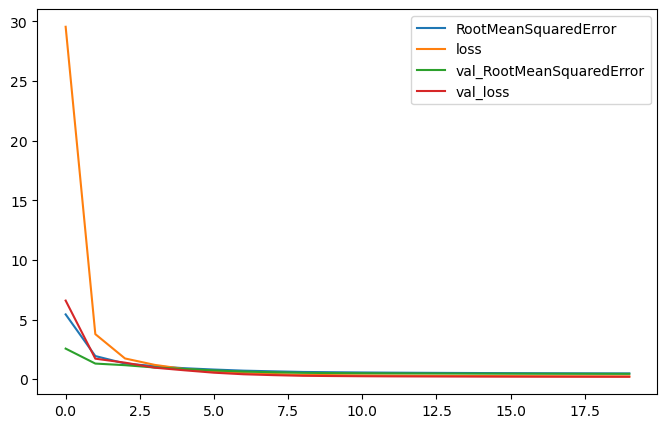

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [56]:
from sklearn.datasets import load_iris
iris_df = load_iris(as_frame=True)

In [57]:
from sklearn.model_selection import train_test_split
X = iris_df.data
y = iris_df.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [58]:
# hidden 10,20,30
# 결합 방식은 함수형 API 방식
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(10,activation='relu')
hidden2 = tf.keras.layers.Dense(20,activation='relu')
hidden3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(3,activation='softmax')

# 결합
x = norm(input)
x = hidden1(x)
x = hidden2(x)
x = hidden3(x)
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])

In [59]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.3372 - loss: 1.2222 - val_accuracy: 0.2083 - val_loss: 1.2482
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3372 - loss: 1.1626 - val_accuracy: 0.2083 - val_loss: 1.1904
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3372 - loss: 1.1213 - val_accuracy: 0.2083 - val_loss: 1.1466
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3372 - loss: 1.0900 - val_accuracy: 0.2083 - val_loss: 1.1113
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3372 - loss: 1.0631 - val_accuracy: 0.2083 - val_loss: 1.0815
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3372 - loss: 1.0384 - val_accuracy: 0.2917 - val_loss: 1.0553
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5130 - loss: 1.0152 - val_accuracy: 0.5000 - val_loss: 1.0317
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6393 - loss: 0.9928 - val_accuracy: 0.5000 - val_loss: 1.0102


In [60]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7000 - loss: 0.7259


[0.7258767485618591, 0.699999988079071]

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

1.0

- 타이타닉

In [63]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic_df = titanic.copy()

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

titanic_df = titanic_df.drop(['class', 'who', 'embarked', 'alive'],axis=1)
titanic_df = titanic.dropna()
X = titanic_df.drop('survived',axis=1)
y = titanic_df['survived']

X = pd.get_dummies(X)
# X = StandardScaler().fit_transform(X) --> normalize 하므로 불필요
X.shape, y.shape

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify = y, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2, stratify= y_train, random_state=42)


# 딥러닝 모델 설계
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(10,activation='relu')
hidden2 = tf.keras.layers.Dense(20,activation='relu')
hidden3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(3,activation='softmax')

# 결합
x = norm(input)
x = hidden1(x)
x = hidden2(x)
x = hidden3(x)
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6825 - loss: 1.0825 - val_accuracy: 0.6897 - val_loss: 1.0523
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6825 - loss: 0.8731 - val_accuracy: 0.6552 - val_loss: 0.9330
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6631 - loss: 0.7867 - val_accuracy: 0.6552 - val_loss: 0.8285
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7307 - loss: 0.7247 - val_accuracy: 0.6552 - val_loss: 0.7453
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7158 - loss: 0.6893 - val_accuracy: 0.6897 - val_loss: 0.7036
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7158 - loss: 0.6727 - val_accuracy: 0.6897 - val_loss: 0.6863
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7376 - loss: 0.6616 - val_accuracy: 0.7241 - val_loss: 0.6844
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7320 - loss: 0.6540 - val_accuracy: 0.6897 - val_loss: 0.6835


In [70]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_11                │ (None, 30)             │            61 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,822 (14.94 KB)

 Trainable params: 1,253 (4.89 KB)

 Non-trainable params: 61 (248.00 B)

 Optimizer params: 2,508 (9.80 KB)

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

titanic_df = titanic_df.drop(['class', 'who', 'embarked', 'alive'],axis=1)
titanic_df = titanic.dropna()
X = titanic_df.drop('survived',axis=1)
y = titanic_df['survived']

X = pd.get_dummies(X)
# X = StandardScaler().fit_transform(X) --> normalize 하므로 불필요
X.shape, y.shape

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify = y, random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2, stratify= y_train, random_state=42)


# 딥러닝 모델 설계
import tensorflow as tf
input = tf.keras.layers.Input(shape=x_train.shape[1:])
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(10,activation='relu')
hidden2 = tf.keras.layers.Dense(20,activation='relu')
hidden3 = tf.keras.layers.Dense(30,activation='relu')
output = tf.keras.layers.Dense(1,activation='sigmoid')

# 이진분류 : binary_crossentropy
# 다중분류
  # 정답이 레이블 형태면 sparse_category_crossentropy
  # 정답이 원핫형태면 category_crossentropy
  # 데이터를 원핫으로 변경하고 category_crossentropy 성능이 좀 더 좋은 경우가 많음

# 결합
x = norm(input)
x = hidden1(x)
x = hidden2(x)
x = hidden3(x)
output = output(x)

model = tf.keras.Model(inputs=[input],outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))
model.evaluate(x_test,y_test)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6825 - loss: 1.0965 - val_accuracy: 0.6897 - val_loss: 0.9893
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6825 - loss: 0.7752 - val_accuracy: 0.4138 - val_loss: 0.8351
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4487 - loss: 0.7250 - val_accuracy: 0.3448 - val_loss: 0.8023
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4434 - loss: 0.7022 - val_accuracy: 0.6897 - val_loss: 0.7366
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6773 - loss: 0.6624 - val_accuracy: 0.6552 - val_loss: 0.7380
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6860 - loss: 0.6638 - val_accuracy: 0.6552 - val_loss: 0.6859
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7009 - loss: 0.6336 - val_accuracy: 0.6552 - val_loss: 0.6418
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6922 - loss: 0.6178 - val_accuracy: 0.6207 - val_loss: 0.6343


[0.5114899277687073, 0.7567567825317383]

In [78]:
result = model.predict(x_test)
result

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.664783  ],
       [0.6728661 ],
       [0.73632205],
       [0.65912366],
       [0.5928062 ],
       [0.7493614 ],
       [0.53333   ],
       [0.59176815],
       [0.60689133],
       [0.6528013 ],
       [0.6578635 ],
       [0.6528945 ],
       [0.6134926 ],
       [0.7439965 ],
       [0.5962578 ],
       [0.7419124 ],
       [0.57520616],
       [0.72732055],
       [0.58424264],
       [0.60920507],
       [0.57588696],
       [0.71974325],
       [0.92269886],
       [0.13675387],
       [0.5972724 ],
       [0.69880915],
       [0.64507896],
       [0.295124  ],
       [0.72620976],
       [0.8217217 ],
       [0.80373836],
       [0.27331832],
       [0.71026415],
       [0.6744883 ],
       [0.58177465],
       [0.72014797],
       [0.60687405]], dtype=float32)